<a href="https://colab.research.google.com/github/syedmuneeb321/LangGraph-Explorations/blob/main/Getting_Started_With_LangGraph/basic_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture --no-stderr
%pip install -U langgraph langsmith langchain_google_genai

In [ ]:
import os
from google.colab import userdata

os.environ["LANGCHAIN_API_KEY"] = userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = userdata.get('LANGCHAIN_PROJECT')

gemini_api_key = userdata.get('GOOGLE_API_KEY')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import StrOutputParser
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    max_retries=2,
    api_key=gemini_api_key
)

chain = llm | StrOutputParser()
chain.invoke("greet me")

'Hello there! How can I help you today? \n'

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [ ]:
new_messages_1 = [{"role": "user", "content": "Hello"}]
new_messages_2 = [{"role": "ai", "content": "Hi there!"}]
new_message3 = ["hello bor","hi"]
final_messages = add_messages(new_messages_1, new_message3)
next_message = add_messages(final_messages, new_messages_2)
print(final_messages)
display(next_message)

[HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='62a9d1fb-3caf-46da-9ee6-f4437258a22a'), HumanMessage(content='hello bor', additional_kwargs={}, response_metadata={}, id='9097af96-7985-4a55-b29f-cf2b17362abd'), HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='257c1e6c-f751-49e7-b7e7-67ce80b3770d')]


[HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='62a9d1fb-3caf-46da-9ee6-f4437258a22a'),
 HumanMessage(content='hello bor', additional_kwargs={}, response_metadata={}, id='9097af96-7985-4a55-b29f-cf2b17362abd'),
 HumanMessage(content='hi', additional_kwargs={}, response_metadata={}, id='257c1e6c-f751-49e7-b7e7-67ce80b3770d'),
 AIMessage(content='Hi there!', additional_kwargs={}, response_metadata={}, id='3288799e-a7d5-4e40-b9d8-0aa98ea7a012')]

In [ ]:
# create a state

class State(TypedDict):
  messages: Annotated[list,add_messages]




In [ ]:
# create a node

def chat_bot(state:State)->State:
  return {"messages":[llm.invoke(state["messages"])]}

In [ ]:
state_builder = StateGraph(State)
state_builder.add_node("chat_bot",chat_bot)

state_builder.add_edge(START,"chat_bot")
state_builder.add_edge("chat_bot",END)

app = state_builder.compile()


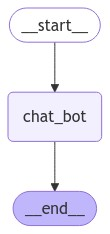

In [ ]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
display(app.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'chat_bot': Node(id='chat_bot', name='chat_bot', data=chat_bot(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='chat_bot', data=None, conditional=False), Edge(source='chat_bot', target='__end__', data=None, conditional=False)])

In [ ]:
messages = [("user","hi how are you roabot")]

In [ ]:
for event in app.stream({"messages":messages}):
  print(list(event.values())[0]["messages"][-1].content)

As an AI, I don't have feelings or experiences like humans do, so I don't "feel" anything.  

However, I'm here and ready to assist you with any questions or tasks you have! How can I help you today? 😊 

